# **Assigment Feedback:**

**⚠️ Common Issues to Fix**:

- Variable naming consistency: Python is case-sensitive, so always keep naming consistent.
- Check what kind of data you work with before passig it into your function.
- Excel data often comes in as 2D arrays (rows × columns). Your fft function works with numerical values. 
- How do you handle negative values of the frequency? 
- Document your code: Add short comments explaining why you’re doing each step.
- Remember the syntax: like english, Python has its own rules. If you don't follow them - your code will not run.

In [ ]:
#Example: How to write a function

# **Event Detection Analysis**

One of the more common types of analysis you will encounter in neuroscience research is **event detection analysis**. At its core, this approach is about identifying when something **meaningful** happens in your data.

Some examples may include:

- **EEG/EMG:** Detecting sleep spindles, REM twitches, or muscle bursts.

- **Fiber photometry:** Identifying dopamine transients when animals transition to wakefulness. 

- **Behavioral data:** Detecting lever presses or nose pokes in an operant task.

- **Electrophysiology:** Identifying spikes or bursts of neural activity.

# **Data from your Assignment: Fiber Photometry Event Detection**

We often record continuous data using fiber photometry. These signals reflect the population activity of neurons in a region of interest

Sometimes, the neurons are relatively silent, showing little to no signal change.

At other times, they show bursts of activity during certain behavioural events or physiological states (for example, when the animal transitions into REM sleep).

By counting peaks in neuronal activity, we can quantify how often these bursts occur, compare their timing across different conditions, and relate them to behaviour.

Why this is useful:

For instance, if we look at the data in your assignment, we are asking whether peaks in our fiber photometry recordings, which reflect the population activity of SUML neurons, occur at the same time as theta peaks in the EEG signal. **If the activity of SUML neurons consistently spikes around the same time when theta oscillations occur, this suggests that these neurons may play a role in generating these theta rhythms.**

**Why it matters:**
This analysis helps us answer key mechanistic questions: Are these neurons drivers of oscillations? Or are they independent? 

***This ultimately brings us closer to identifying how cellular activity drives changes in our behaviors.***



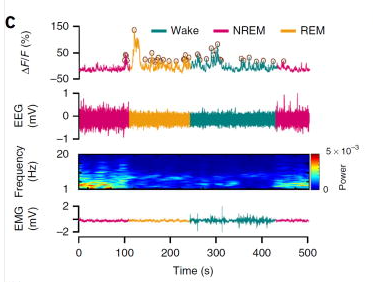

Paper: https://www.nature.com/articles/nn.4377

# **Code Along Example: Muscle Twitches** 

To help you get familiar with this type of analysis, we will be looking at EMG data today, specifically muscle activity during REM sleep. REM sleep muscle activity consists of basal muscle tone (tonic activity), punctuated by brief muscle twitches (**phasic activity**). 

You may ask why is it important to look at EMG activity during REM sleep? Let alone detect twitches?

# **REM Sleep Muscle Activity and Neurodegenerative Diseases**

Neurodegenerative disorders like Parkinson’s disease are highly debilitating, and researchers are seeking early biomarkers to improve diagnosis and management. REM Sleep Behavior Disorder (RBD) has emerged as one of the strongest predictors, since patients show abnormal muscle activity and movements during REM sleep instead of the normal muscle paralysis. Alarmingly, 80–100% of RBD patients eventually develop a neurodegenerative disease, though the mechanisms linking the two remain poorly understood.

https://www.youtube.com/watch?v=kqaxHBx9Zsk

In order to model these disorders in animals (for example, mice), we need analytical approaches that allow us to measure the same kinds of abnormalities (increase in muscle activity) seen in patients. 



# **Loading necessary packages**

In [ ]:
#Loading Necessary Packages
# This is used to access Python interactive environment. This way we can feed input and receive output as we code.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd #this package will be used for managing dataframes and excel sheets
import numpy as np  #this package will be used to perform math functions

# **Importing the Spreadsheet with data into Python.**

In [ ]:
emg_data = "..."

# Save the Excel file. We skip the first 5 data rows because
# they are just text labels ("Measurement", "Bin width", etc.)

emg_df = pd.read_excel(emg_data, sheet_name="Sheet1", skiprows= ...)

In [ ]:
emg_df #look at our data frame 

In [ ]:
# Rename columns for clarity
emg_df... = ["bin_#", "time_seconds", "emg_value"]
emg_df

# Data Frames with Missing Values 


In our Excel sheet, each REM sleep episode is separated by an empty row. This empty space acts like a divider: above it are the EMG values from one REM episode, and below it begins the next REM sleep episode. When we load the sheet into Python, those empty rows show up as “missing values.” We can detect them using the function **pd.isna()**, which tells us whether a cell is empty or not. By checking for these empty rows, we know exactly when one REM episode ends and the next begins. This allows us to split the entire EMG recording into separate episodes that we can analyze one by one.

What does **pd.isna()** do?

It checks if a value is “NaN” (Not a Number) or missing/empty.

Returns:

- **True** → if the value is missing, empty, or NaN.

- **False** → if the value is valid (a real number, string, etc.).

In [ ]:
all_rem_episodes = []              # will store ALL episodes in a list
current_episode_values = []        # temporary storage for ONE episode

for .., .. in emg_df...(): #Iterate over DataFrame iterrows()
    # "row_index"   = the row number in the table (0, 1, 2, …)
    # "row_contents"= the actual row values (bin_#, time_seconds, emg_value)

    # If the EMG value in this row is missing, we reached the end of one episode
    if pd...(row_contents["emg_value"]):
        if len(current_episode_values) > ...:  # only save is list is not empty
            all_rem_episodes.append(...)
            current_episode_values = []  # reset to start a new episode
    else:
        # Otherwise, add this EMG value to the current episode
        current_episode_values.append(row_contents["emg_value"])

# After the loop, save the final episode if it is not empty
if len(current_episode_values) > ...:
    all_rem_episodes.append(current_episode_values)



# **List of lists?**

Right now, we have a list of lists where each sub-list is one REM sleep episodes' EMG values. 

This is fine, but… how do you know which one is REM1 or REM2? You only know their position number:

- all_rem_episodes[0] → first REM

- all_rem_episodes[1] → second REM

- all_rem_episodes[2] → third REM and so on..

Of course, this works, but it isn’t very readable

In [ ]:
print(...)

# Enumerate()
We want to give each episode a meaningful name like “REM1”, “REM2”, etc., and store them in a dictionary. To do that, we can use enumerate() function, which gives us both the position number of each episode (index) and its values. The position number let us build a key (“REM1”), and the values became the dictionary entry.

In [ ]:
# By turning it into a dictionary, we can label each episode:
# Make a dictionary where:
# - Key   = "REM1", "REM2", …
# - Value = list of EMG values for that episode

rem_episodes_dictionary = {}

for episode_index, emg_val in ...(all_rem_episodes):
    key_name = "REM" + str(...)   # e.g., "REM" + "1" = "REM1"
    rem_episodes_dictionary[...] = ...


We turn the list of lists into a **dictionary** so that each REM episode has a clear, readable label (“REM1”, “REM2”, …). This makes the code easier to read, the results easier to interpret, and the data easier to use later on. Instead of remembering that position 0 means REM1, we can just call it “REM1” key directly.

In [ ]:
for episode_name, emg_values in rem_episodes_dictionary.items():
    print(episode_name, "has", len(emg_values), "EMG values")

If you remember from the previous tutorial, Python normally starts counting from 0. That means the first item in a list is at position 0, the second at position 1, and so on. To make our code match "human labels", we can simply tell Python’s enumerate function to start its counting from 1 instead of 0. This way, the first REM episode gets labeled as "REM1", the second as "REM2", and so on—making the output easier to read.

In [ ]:
# By turning it into a dictionary, we can label each episode:
# Make a dictionary where:
# - Key   = "REM1", "REM2", …
# - Value = list of EMG values for that episode

rem_episodes_dictionary = {}

for episode_index, emg_val in enumerate(all_rem_episodes, start = ...):
    key_name = "REM" + str(episode_index)   # e.g., "REM" + "1" = "REM1"
    rem_episodes_dictionary[key_name] = emg_val

In [ ]:
for episode_name, emg_values in rem_episodes_dictionary.items():
    print(episode_name, "has", len(emg_values), "EMG values")

# Counting Peaks: Finding a library

Skipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

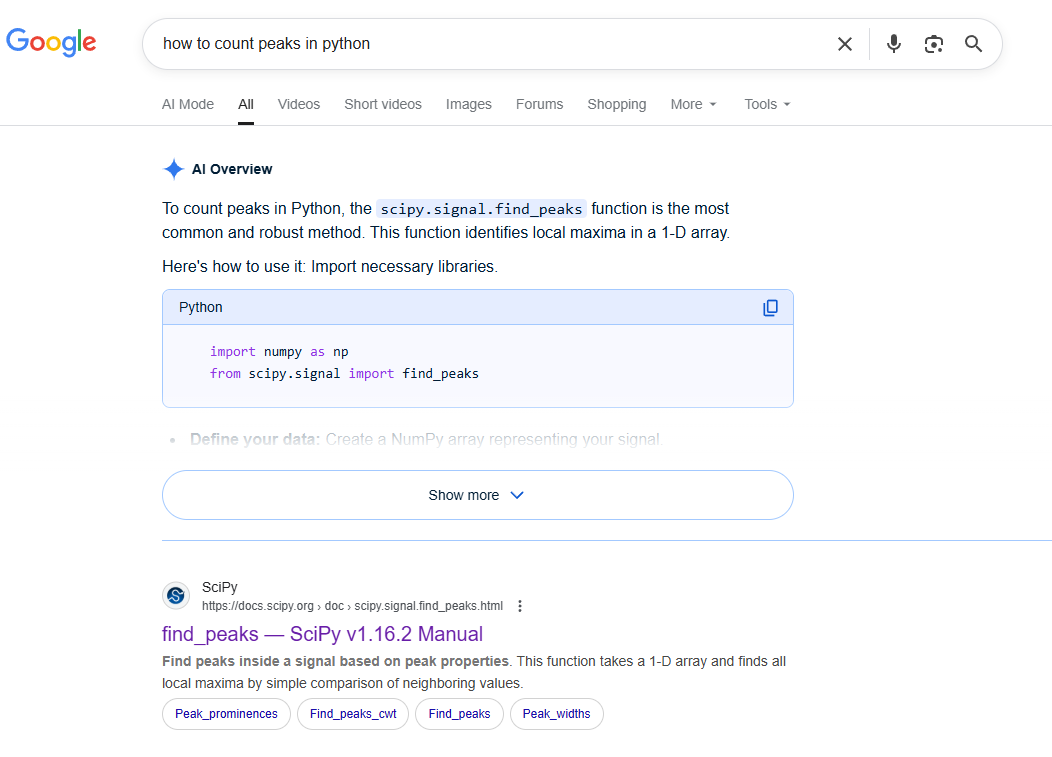

In [ ]:
from scipy.signal import ... #loading new library

# **What is find_peaks?**

find_peaks is a function from the SciPy library (scipy.signal) that helps us find the local peaks in a 1-D signal (like your EMG data).

A peak is simply a point that is higher than its neighbors (like the top of a mountain)

**From Skipy Library Example:**

- x → your list/array of EMG values.
- peaks → a list of indices (positions) where peaks are found.
- _ → a dictionary with details about the peaks (heights, widths, etc.).

In [ ]:
#creating our own function for our EMG_Data
def count_twitches_with_scipy(...):

    # 1. Compute threshold
    threshold_value = np.percentile(emg_values, ...) #compute the q-th percentile of data (from other papers)

    # 2. Find peaks above the threshold
    peak_indices, peak_info = find_peaks(..., height=...)

    # 3. Extract the actual peak heights (top of the mountain)
    peak_heights = peak_info["peak_heights"]

    # 4. Count how many peaks
    n_peaks = len(peak_indices)

    return threshold_value, n_peaks, peak_indices, peak_heights



In [ ]:
# ----------- Run on the REM dictionary -----------
total_peaks = 0

for ..., ... in rem_episodes_dictionary.items(): #iterate through your dictionary
    threshold_value, n_peaks, peak_indices, peak_heights = count_twitches_with_scipy(emg_values) #apply our function

    print("Episode:", episode_name)
    print("  Threshold (99th percentile):", ...)
    print("  Number of peaks:", ...)
    print("  Peak indices:", ...)
    print("  highest_peaks:", ...)
    print()

    total_peaks += n_peaks

print("TOTAL twitch peaks across all REM episodes:", ...)

# Something to think about: What threshold would you use for your SUML Data?